In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
qa=pd.read_csv("QAv2.csv",header=1)
# follow_up=pd.read_csv("follow_up.csv",header=0)


def string_to_list(json_str):
    return json.loads(json_str)
    
qa["Expected_Roles"]=qa["Expected Role"].apply(string_to_list)
# follow_up["Expected_Roles"]=follow_up["Expected Role"].apply(string_to_list)
expected_roles=list(qa.Expected_Roles.values)
# expected_roles.extend(list(follow_up.Expected_Roles.values))

In [11]:
roles=[i[0] if len(i)==1 else j for i in expected_roles for j in i ]
distinct_roles=list(set(roles))

In [12]:
distinct_roles

['Reply to previous conversation',
 'Providing Homework Guidance',
 'Asking for Clarifying Concepts or Topics',
 'Answering Questions about Syllabus',
 'Answering Questions on Lecture Slides',
 'Homework Question Clarification']

In [13]:
count_tracker={i:roles.count(i) for i in distinct_roles}

In [39]:
count_tracker

{'Reply to previous conversation': 10,
 'Providing Homework Guidance': 37,
 'Asking for Clarifying Concepts or Topics': 37,
 'Answering Questions about Syllabus': 13,
 'Answering Questions on Lecture Slides': 39,
 'Homework Question Clarification': 33}

In [40]:
indexes=["Follow up question",'Homework Guidance','Clarifying Concepts or Topics','Questions about Syllabus','Questions on Lecture Slides','Homework Question Clarification']
new_count_tracker={indexes[enum]:value for enum,(key,value) in enumerate(count_tracker.items())}

In [41]:
new_count_tracker

{'Follow up question': 10,
 'Homework Guidance': 37,
 'Clarifying Concepts or Topics': 37,
 'Questions about Syllabus': 13,
 'Questions on Lecture Slides': 39,
 'Homework Question Clarification': 33}

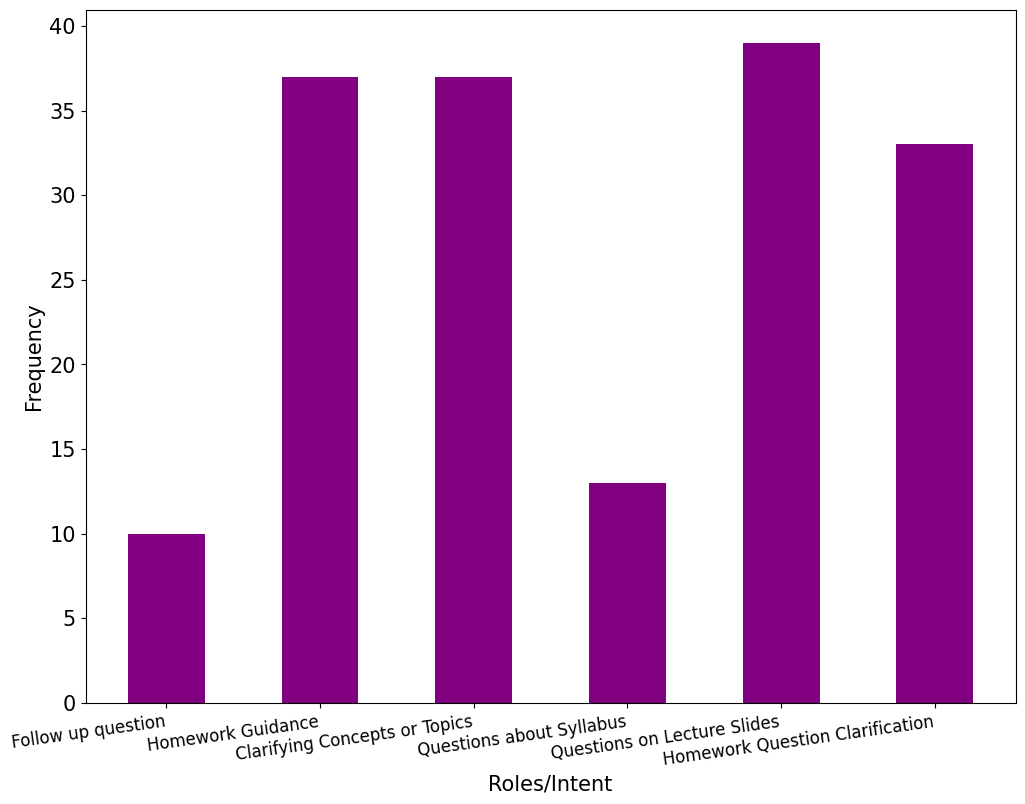

In [47]:
# Extract data for plotting
categories = list(new_count_tracker.keys())
values = list(new_count_tracker.values())

# Create a bar plot
plt.figure(figsize=(12, 9))
plt.bar(categories,values, color='purple',width=0.5)
plt.xlabel('Roles/Intent',fontsize=15)
plt.ylabel("Frequency",fontsize=15)
# plt.title('Distribution of Expected Roles/Intents in curated dataset ',fontsize=12)
plt.gca()
plt.xticks(rotation=8, ha='right',fontsize=12)
plt.yticks(fontsize=15)
# ha='right' aligns labels to the right for better readability
# Display the plot
plt.savefig("Figures/roles_distribution.png")
plt.show()

In [32]:
qa["Objective"]

0      without lecture hint
1         with lecture hint
2      without lecture hint
3         with lecture hint
4         with lecture hint
               ...         
110      Follow Up question
111      Follow Up question
112      Follow Up question
113      Follow Up question
114      Follow Up question
Name: Objective, Length: 115, dtype: object

# Detailed Analysis of homework/lecture based questions/prompt in the QA pairs

In [33]:
objectives=list(qa["Objective"].dropna())
objectives=[i.replace("hind","hint").replace("slide","hint") for i in objectives]
distinct_obj=list(set(objectives))


In [34]:
distinct_obj

['without lecture hint',
 'with lecture hint and lecture index',
 'with homework hint',
 'Follow Up question',
 'without homework hint',
 'with lecture hint',
 'with homework hint and homework index']

In [35]:
objective_tracker={i:objectives.count(i) for i in distinct_obj}

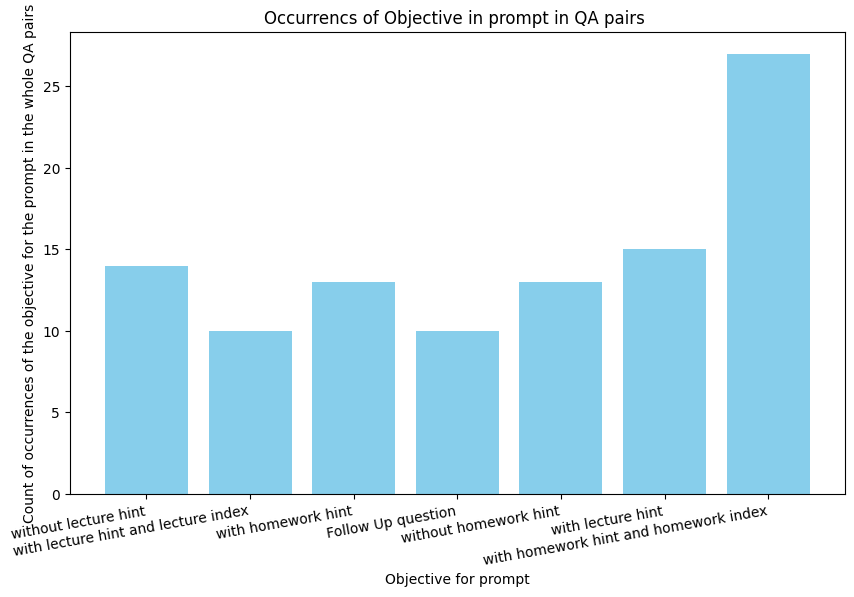

In [36]:
# Extract data for plotting
categories = list(objective_tracker.keys())
values = list(objective_tracker.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories,values, color='skyblue')
plt.xlabel('Objective for prompt')
plt.ylabel("Count of occurrences of the objective for the prompt in the whole QA pairs")
plt.title('Occurrencs of Objective in prompt in QA pairs ')
plt.gca()
plt.xticks(rotation=10, ha='right')  # Display the plot
plt.show()